In [1]:
from preprocess.preprocess import load_dataset, compute_label_agg, select_data, get_data_loaders, undersample

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim

from models.RNN import MMRNN
from utils.RNN_utils import *

d:\SUTD\T6\DL Project\Deep_Learning_ECGclassification\utils\RNN_utils.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# Define device for torch
use_cuda = True
print("CUDA is available:", torch.cuda.is_available())
device = torch.device("cuda" if (
    use_cuda and torch.cuda.is_available()) else "cpu")

CUDA is available: True


# Set options


In [3]:
LOAD_DATASET = False
TRAIN_PATH = './PTB_train_undersampled.pt'
VALID_PATH = './PTB_valid_undersampled.pt'
TEST_PATH = './PTB_test_undersampled.pt'
SAVE_NAME = 'MMRNN_undersampled_epoch_30'
SAVE_DIR = './model_saves/'
BATCH_SIZE = 256

EPOCH = 30

torch.manual_seed(0)


# Load the dataset


In [4]:
if LOAD_DATASET:
    train_loader = torch.load(TRAIN_PATH)
    valid_loader = torch.load(VALID_PATH)
    test_loader = torch.load(TEST_PATH)
else:
    path = './data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/'

    data, raw_labels = load_dataset(path)

    labels = compute_label_agg(raw_labels, path)

    data, labels, y = select_data(data, labels)

    data, labels, y = undersample(data, labels, y)

    train_loader, valid_loader, test_loader = get_data_loaders(
        data, labels, y, BATCH_SIZE)

    torch.save(train_loader, TRAIN_PATH)
    torch.save(valid_loader, VALID_PATH)
    torch.save(test_loader, TEST_PATH)

# Train the model


In [5]:

model = MMRNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-2)
criterion = nn.BCEWithLogitsLoss()

model = train_RNN(EPOCH, train_loader, valid_loader, model,
                  criterion, optimizer, device=device, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: [1/30], Step [3584/417150] | Train Loss:  1.023         | Train Accuracy:  0.401         | Val Loss:  0.507         | Val Accuracy:  0.562
Model saved to ==> ./model_saves/model_MMRNN_undersampled_epoch_30.pt
Epoch: [1/30], Step [7168/417150] | Train Loss:  0.756         | Train Accuracy:  0.503         | Val Loss:  0.454         | Val Accuracy:  0.639
Model saved to ==> ./model_saves/model_MMRNN_undersampled_epoch_30.pt
Epoch: [1/30], Step [10496/417150] | Train Loss:  0.646         | Train Accuracy:  0.569         | Val Loss:  0.399         | Val Accuracy:  0.711
Model saved to ==> ./model_saves/model_MMRNN_undersampled_epoch_30.pt
Epoch: [1/30], Step [13905/417150] | Train Loss:  0.579         | Train Accuracy:  0.617         | Val Loss:  0.382         | Val Accuracy:  0.714
Model saved to ==> ./model_saves/model_MMRNN_undersampled_epoch_30.pt
Epoch: [2/30], Step [17489/417150] | Train Loss:  0.352         | Train Accuracy:  0.777         | Val Loss:  0.376         | Val Accu

# Evaluate and plot losses


Test Accuracy:  0.831


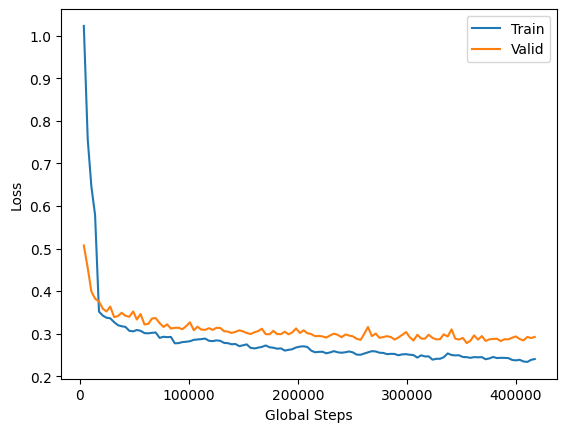

In [6]:
test_accuracy = evaluate_RNN(model, test_loader)
plot_losses(metrics_save_name=SAVE_NAME, save_dir=SAVE_DIR)
rename_with_acc(SAVE_NAME, SAVE_DIR, test_accuracy)
